In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, svm 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
#warnings
import warnings
warnings.filterwarnings('ignore')


/var/folders/h2/bl2bgq3x4zb1fsnmk_06k8d80000gn/T/ipykernel_47065/1743462256.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Loading in data

In [2]:
crimeDF = pd.read_csv('/Users/joeyposillico/Downloads/crimedata2.csv', encoding='ISO-8859-1')
crimeDF.head()

,Êcommunityname,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,BerkeleyHeightstownship,NJ,39,5320,1,11980,3.10,1.37,91.78,6.50,...,14,114.85,138,1132.08,16,131.26,2,16.41,41.02,1394.59
1,Marpletownship,PA,45,47616,1,23123,2.82,0.80,95.57,3.44,...,57,242.37,376,1598.78,26,110.55,1,4.25,127.56,1955.95
2,Tigardcity,OR,?,?,1,29344,2.43,0.74,94.33,3.43,...,274,758.14,1797,4972.19,136,376.3,22,60.87,218.59,6167.51
3,Gloversvillecity,NY,35,29443,1,16656,2.40,1.70,97.35,0.50,...,225,1301.78,716,4142.56,47,271.93,?,?,306.64,?
4,Bemidjicity,MN,7,5068,1,11245,2.76,0.53,89.16,1.17,...,91,728.93,1060,8490.87,91,728.93,5,40.05,?,9988.79


In [3]:
crimeDF.describe()

,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,...,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,murders,murdPerPop
count,2215.000000,2.215000e+03,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,...,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000
mean,5.494357,5.311798e+04,2.707327,9.335102,83.979819,2.670203,7.950176,14.445837,27.644840,13.975142,...,61.539630,51.538596,77.411079,88.111865,27.419955,2783.835034,3.041124,0.980163,7.764786,5.859296
std,2.872924,2.046203e+05,0.334120,14.247156,16.419080,4.473843,14.589832,4.518623,6.181517,5.970747,...,16.750061,10.517926,10.878186,7.287836,109.822600,2828.993341,4.912917,2.877128,58.166468,9.156829
min,1.000000,1.000500e+04,1.600000,0.000000,2.680000,0.030000,0.120000,4.580000,9.380000,4.640000,...,6.750000,11.830000,27.950000,32.830000,0.900000,10.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.436600e+04,2.500000,0.860000,76.320000,0.620000,0.930000,12.250000,24.415000,11.320000,...,50.110000,44.995000,72.060000,85.200000,7.300000,1181.900000,0.360000,0.000000,0.000000,0.000000
50%,5.000000,2.279200e+04,2.660000,2.870000,90.350000,1.230000,2.180000,13.620000,26.780000,12.540000,...,64.490000,52.170000,79.490000,90.030000,13.700000,2027.300000,1.220000,0.000000,1.000000,2.170000
75%,8.000000,4.302400e+04,2.850000,11.145000,96.225000,2.670000,7.810000,15.360000,29.205000,14.345000,...,74.855000,58.740000,85.135000,93.010000,26.100000,3321.700000,3.365000,0.000000,3.000000,8.365000
max,10.000000,7.322564e+06,5.280000,96.670000,99.630000,57.460000,95.290000,54.400000,70.510000,63.620000,...,93.140000,78.560000,96.590000,99.900000,3569.800000,44229.900000,54.330000,48.440000,1946.000000,91.090000


In [4]:
crimeDF.shape

(2215, 147)

In [5]:
crimeDF.columns

Index(['Êcommunityname', 'state', 'countyCode', 'communityCode', 'fold',
       'population', 'householdsize', 'racepctblack', 'racePctWhite',
       'racePctAsian',
       ...
       'burglaries', 'burglPerPop', 'larcenies', 'larcPerPop', 'autoTheft',
       'autoTheftPerPop', 'arsons', 'arsonsPerPop', 'ViolentCrimesPerPop',
       'nonViolPerPop'],
      dtype='object', length=147)

### Checking if any null values to deal with

In [6]:
crimeDF.isna().sum()

Êcommunityname         0
state                  0
countyCode             0
communityCode          0
fold                   0
                      ..
autoTheftPerPop        0
arsons                 0
arsonsPerPop           0
ViolentCrimesPerPop    0
nonViolPerPop          0
Length: 147, dtype: int64

- there are no null values in this data set

In [7]:
crimeDF.value_counts()

Êcommunityname          state  countyCode  communityCode  fold  population  householdsize  racepctblack  racePctWhite  racePctAsian  racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  numbUrban  pctUrban  medIncome  pctWWage  pctWFarmSelf  pctWInvInc  pctWSocSec  pctWPubAsst  pctWRetire  medFamInc  perCapInc  whitePerCap  blackPerCap  indianPerCap  AsianPerCap  OtherPerCap  HispPerCap  NumUnderPov  PctPopUnderPov  PctLess9thGrade  PctNotHSGrad  PctBSorMore  PctUnemployed  PctEmploy  PctEmplManu  PctEmplProfServ  PctOccupManu  PctOccupMgmtProf  MalePctDivorce  MalePctNevMarr  FemalePctDiv  TotalPctDiv  PersPerFam  PctFam2Par  PctKids2Par  PctYoungKids2Par  PctTeen2Par  PctWorkMomYoungKids  PctWorkMom  NumKidsBornNeverMar  PctKidsBornNeverMar  NumImmig  PctImmigRecent  PctImmigRec5  PctImmigRec8  PctImmigRec10  PctRecentImmig  PctRecImmig5  PctRecImmig8  PctRecImmig10  PctSpeakEnglOnly  PctNotSpeakEnglWell  PctLargHouseFam  PctLargHouseOccup  PersPerOccupHous  PersPerOwnOccH

- Here we can see that although there are no null values there are a bunch of '?' values that will need to be dealt with

### dealing with '?' values

In [8]:
rows_with_question_mark = crimeDF.isin(['?']).any(axis=1).sum()
print(rows_with_question_mark)

2104


- 2104 rows contain a question mark this is a significant amount.

In [9]:
question_mark_counts = crimeDF.isin(['?']).sum()
print(question_mark_counts)
most_question_marks = question_mark_counts.sort_values(ascending=False)
print(most_question_marks)

Êcommunityname            0
state                     0
countyCode             1221
communityCode          1224
fold                      0
                       ... 
autoTheftPerPop           3
arsons                   91
arsonsPerPop             91
ViolentCrimesPerPop     221
nonViolPerPop            97
Length: 147, dtype: int64
PctPolicBlack          1872
PolicAveOTWorked       1872
PolicOperBudg          1872
LemasPctPolicOnPatr    1872
LemasGangUnitDeploy    1872
                       ... 
PctTeen2Par               0
PctWorkMomYoungKids       0
PctWorkMom                0
NumKidsBornNeverMar       0
PctPersDenseHous          0
Length: 147, dtype: int64


- here we see that the '?' are more prominent in certain columns and therefore before deciding what to do with them we will break our DF into a subset of the columns we plan on using to get a better idea of how we'll deal with them

In [10]:
crimeDF2 = crimeDF
crimeDF2['PctNotHSGradCAT'] = crimeDF['PctNotHSGrad'].apply(lambda x :
    '0%-10%' if 0 <= x <= 10 else
    '10%-20%' if 10 <= x <=20 else
    '20%-30%' if 20 <= x <=30 else
    '30%-40%' if 30 <= x <=40 else
    '40%-50%' if 40 <= x <=50 else
    '50%-60%' if 50 <= x <=60 else
    '60%-70%' if 60 <= x <=70 else
    '70%-80%' if 70 <= x <=80 else
    '80%-90%' if 80 <= x <=90 else
    '90%-100%' if 90 <= x <=100 else x
    )
crimeDF2.head()

,Êcommunityname,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop,PctNotHSGradCAT
0,BerkeleyHeightstownship,NJ,39,5320,1,11980,3.10,1.37,91.78,6.50,...,114.85,138,1132.08,16,131.26,2,16.41,41.02,1394.59,0%-10%
1,Marpletownship,PA,45,47616,1,23123,2.82,0.80,95.57,3.44,...,242.37,376,1598.78,26,110.55,1,4.25,127.56,1955.95,10%-20%
2,Tigardcity,OR,?,?,1,29344,2.43,0.74,94.33,3.43,...,758.14,1797,4972.19,136,376.3,22,60.87,218.59,6167.51,0%-10%
3,Gloversvillecity,NY,35,29443,1,16656,2.40,1.70,97.35,0.50,...,1301.78,716,4142.56,47,271.93,?,?,306.64,?,30%-40%
4,Bemidjicity,MN,7,5068,1,11245,2.76,0.53,89.16,1.17,...,728.93,1060,8490.87,91,728.93,5,40.05,?,9988.79,20%-30%


- breaking down pctNotHSGrad into subsections for easier use

In [11]:
onlyCrime = crimeDF2[['PctNotHSGrad', 'ViolentCrimesPerPop', 'nonViolPerPop', 'arsonsPerPop', 'autoTheftPerPop', 'larcPerPop', 'burglPerPop', 'assaultPerPop', 'robbbPerPop', 'rapesPerPop', 'murdPerPop']]
onlyCrime.columns

Index(['PctNotHSGrad', 'ViolentCrimesPerPop', 'nonViolPerPop', 'arsonsPerPop',
       'autoTheftPerPop', 'larcPerPop', 'burglPerPop', 'assaultPerPop',
       'robbbPerPop', 'rapesPerPop', 'murdPerPop'],
      dtype='object')

- created a new DF that contains just the variables we plan on using

In [12]:
rows_with_question_mark = onlyCrime.isin(['?']).any(axis=1).sum()
print(rows_with_question_mark)
print(onlyCrime.shape)
onlyCrime.head()

313
(2215, 11)


,PctNotHSGrad,ViolentCrimesPerPop,nonViolPerPop,arsonsPerPop,autoTheftPerPop,larcPerPop,burglPerPop,assaultPerPop,robbbPerPop,rapesPerPop,murdPerPop
0,9.90,41.02,1394.59,16.41,131.26,1132.08,114.85,32.81,8.2,0,0.0
1,13.72,127.56,1955.95,4.25,110.55,1598.78,242.37,102.05,21.26,4.25,0.0
2,9.09,218.59,6167.51,60.87,376.3,4972.19,758.14,38.74,154.95,16.6,8.3
3,33.68,306.64,?,?,271.93,4142.56,1301.78,190.93,57.86,57.86,0.0
4,23.06,?,9988.79,40.05,728.93,8490.87,728.93,112.14,32.04,?,0.0


- with our smaller DF we can now see that there are only 313 rows with '?' which is only 14% of the data.

In [13]:
question_mark_counts_cleaned = onlyCrime.isin(['?']).sum()
print(question_mark_counts_cleaned)

PctNotHSGrad             0
ViolentCrimesPerPop    221
nonViolPerPop           97
arsonsPerPop            91
autoTheftPerPop          3
larcPerPop               3
burglPerPop              3
assaultPerPop           13
robbbPerPop              1
rapesPerPop            208
murdPerPop               0
dtype: int64


In [14]:
onlyCrime.count()

PctNotHSGrad           2215
ViolentCrimesPerPop    2215
nonViolPerPop          2215
arsonsPerPop           2215
autoTheftPerPop        2215
larcPerPop             2215
burglPerPop            2215
assaultPerPop          2215
robbbPerPop            2215
rapesPerPop            2215
murdPerPop             2215
dtype: int64

- here we see that each category has 2215, since there are at most 221 '?' in a single column (violentCrimesPerPop) we will drop these rows

### Dropping the '?' rows

In [15]:
# Replace '?' with NaN
onlyCrime.replace('?', np.nan, inplace=True)
onlyCrime.isna().sum()


PctNotHSGrad             0
ViolentCrimesPerPop    221
nonViolPerPop           97
arsonsPerPop            91
autoTheftPerPop          3
larcPerPop               3
burglPerPop              3
assaultPerPop           13
robbbPerPop              1
rapesPerPop            208
murdPerPop               0
dtype: int64

- turns the '?' values into NaN values so that they are easier to drop

In [16]:
# Drop rows with NaN values
onlyCrime.dropna(inplace=True)
print(onlyCrime.isna().sum())


PctNotHSGrad           0
ViolentCrimesPerPop    0
nonViolPerPop          0
arsonsPerPop           0
autoTheftPerPop        0
larcPerPop             0
burglPerPop            0
assaultPerPop          0
robbbPerPop            0
rapesPerPop            0
murdPerPop             0
dtype: int64


In [17]:
print(onlyCrime.shape)

(1902, 11)


- no more '?' values. 313 total rows dropped, 14% of the data 

### Checking to make sure columns are in the correct data type 

In [18]:
#checking data type for each column
onlyCrime.dtypes

PctNotHSGrad           float64
ViolentCrimesPerPop     object
nonViolPerPop           object
arsonsPerPop            object
autoTheftPerPop         object
larcPerPop              object
burglPerPop             object
assaultPerPop           object
robbbPerPop             object
rapesPerPop             object
murdPerPop             float64
dtype: object

In [19]:
#change data type of all columns to float except for PctNotHSGrad
onlyCrime[onlyCrime.columns[1:]] = onlyCrime[onlyCrime.columns[1:]].astype(float)
onlyCrime.dtypes

PctNotHSGrad           float64
ViolentCrimesPerPop    float64
nonViolPerPop          float64
arsonsPerPop           float64
autoTheftPerPop        float64
larcPerPop             float64
burglPerPop            float64
assaultPerPop          float64
robbbPerPop            float64
rapesPerPop            float64
murdPerPop             float64
dtype: object

- changed all rows to floats, except for PctnotHSGrad because that column got changed to categorical instead of numbers

### Dealing with outliers
- step one visualize to determine if there are many outliers that needs to be dealt with

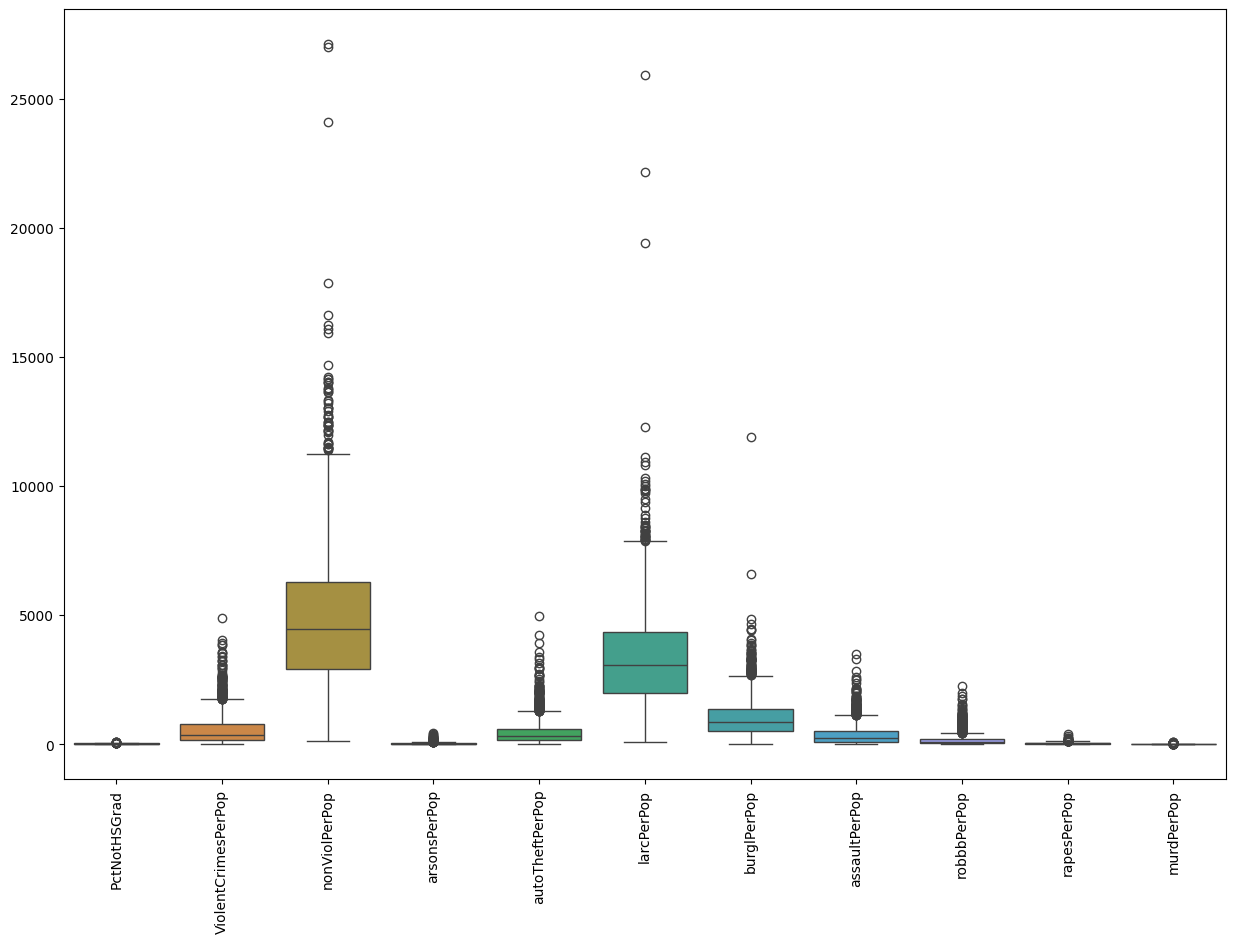

In [20]:
# Boxplot for each column to visualize outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=onlyCrime)
plt.xticks(rotation=90)
plt.show()


- this boxplot shows that some columns such as nonViolPerPop, larcPerPop. burglPerPop 

In [21]:
import numpy as np
from scipy import stats


# Select only numerical columns
numerical_columns = onlyCrime.select_dtypes(include=[np.number])

# Calculate Z-scores for numerical columns
z_scores = stats.zscore(numerical_columns)

# Filter out rows with Z-scores greater than 3 or less than -3
onlyCrime_no_outliers = onlyCrime[(np.abs(z_scores) < 3).all(axis=1)]


- selected only the numerical columns (only one we don't touch here is PctNotHSGrad).
- in order to find and remove outliers we used z-score which measures how far the data oint is from the mean in relation with the standard deviation. If the score was greater than 3 or less than -3 this indicates that the data point is different from the other data points and therefore are removed as outliers. 

In [22]:
onlyCrime_no_outliers.shape

(1724, 11)

- here we see that after dealing with the outliers our data set is now 1738 columns which is roughly 8% removed 

### Plotting the original box plot with the new box plot to make sure the above code worked as intended

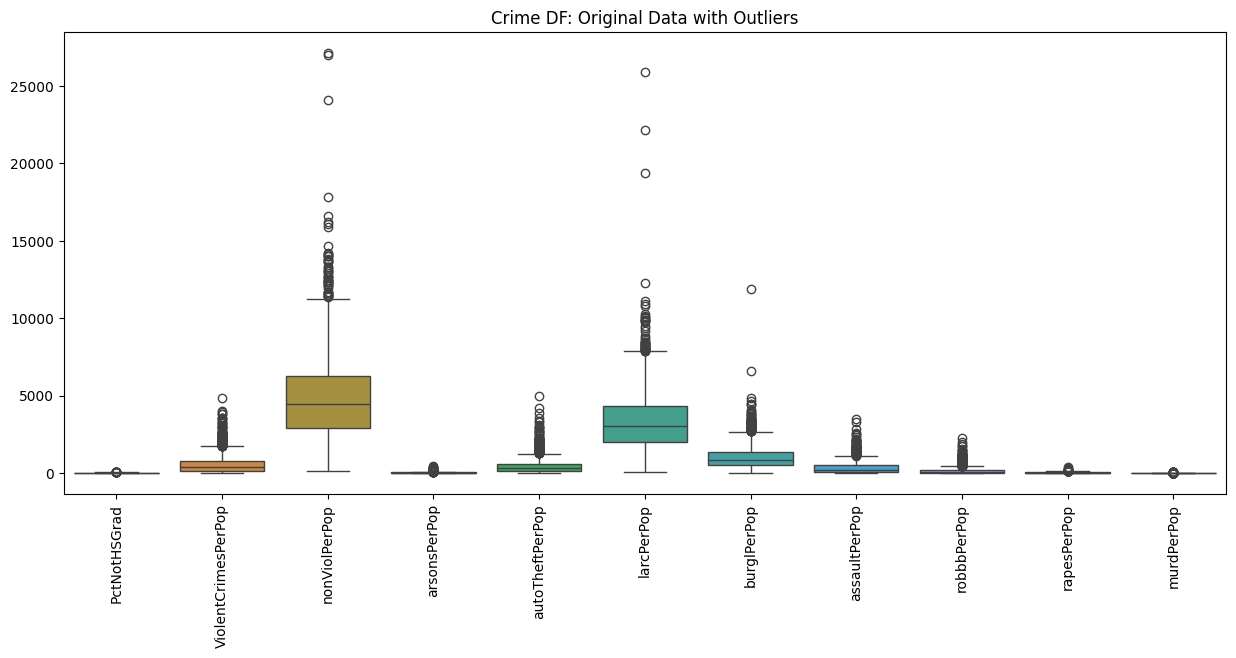

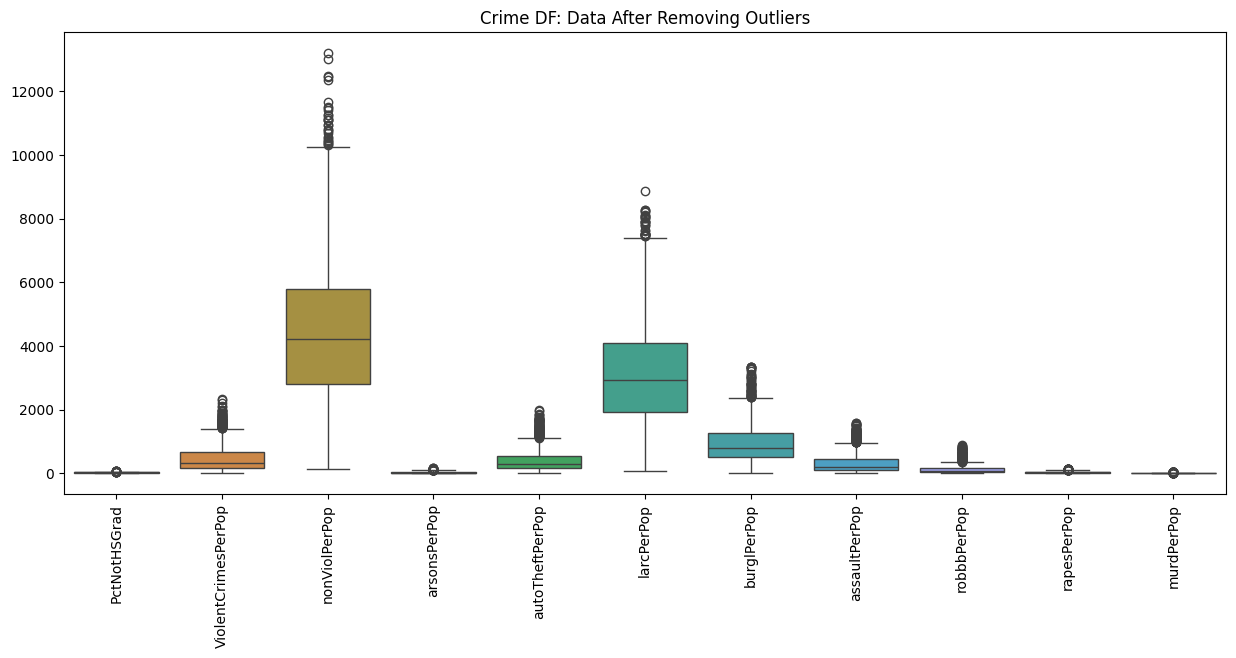

In [23]:
# Boxplot for the original data
plt.figure(figsize=(15, 6))
sns.boxplot(data=numerical_columns)
plt.title("Crime DF: Original Data with Outliers")
plt.xticks(rotation=90)
plt.show()

# Boxplot for the data without outliers
plt.figure(figsize=(15, 6))
sns.boxplot(data=onlyCrime_no_outliers.select_dtypes(include=[np.number]))
plt.title("Crime DF: Data After Removing Outliers")
plt.xticks(rotation=90)
plt.show()


- putting them side by side for better using in our project

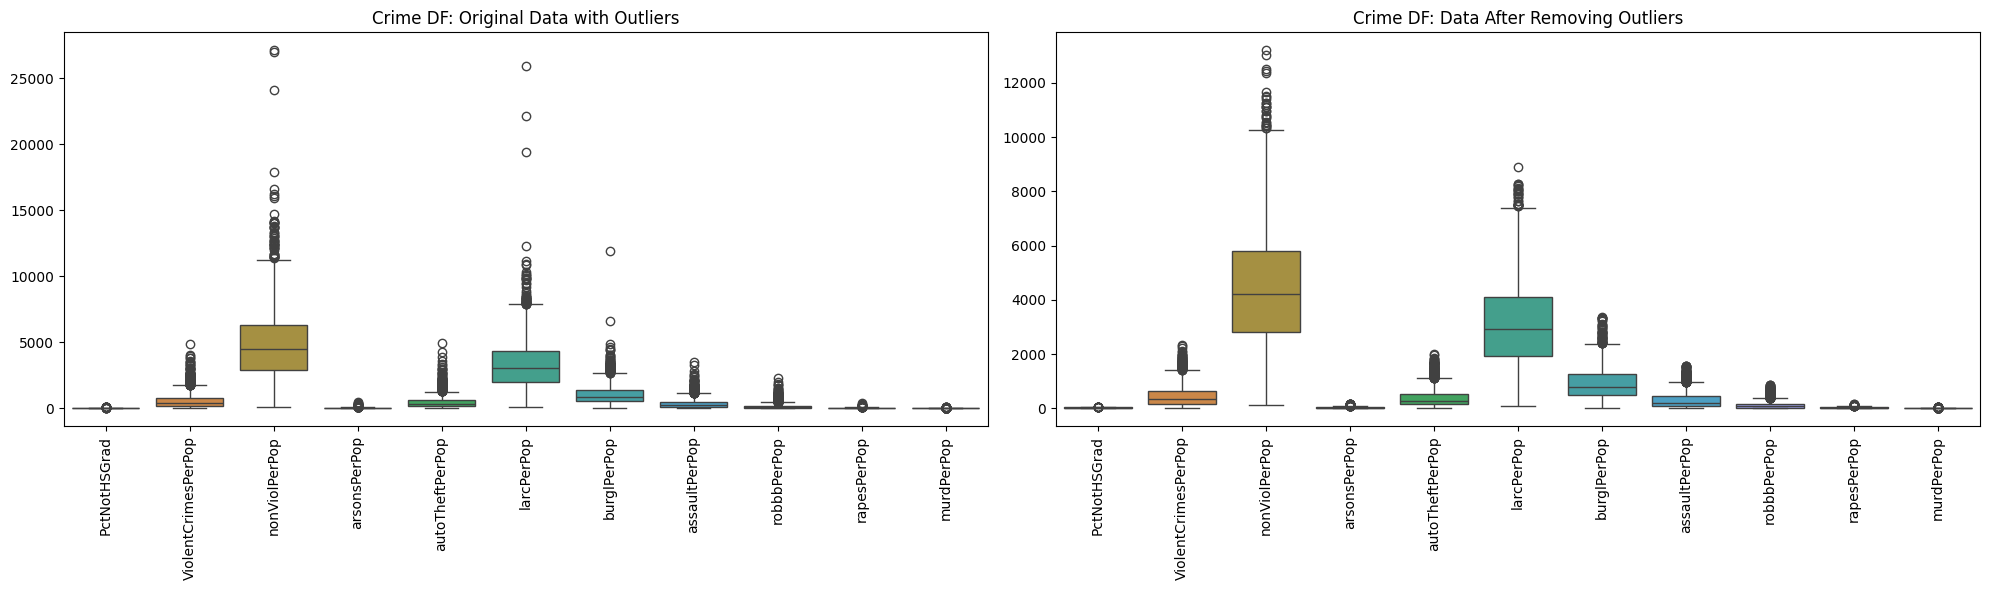

In [24]:
# Create a figure and two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Boxplot for the original data with outliers
sns.boxplot(data=numerical_columns, ax=axes[0])
axes[0].set_title("Crime DF: Original Data with Outliers")
axes[0].tick_params(axis='x', rotation=90)

# Boxplot for the data without outliers
sns.boxplot(data=onlyCrime_no_outliers.select_dtypes(include=[np.number]), ax=axes[1])
axes[1].set_title("Crime DF: Data After Removing Outliers")
axes[1].tick_params(axis='x', rotation=90)

# Display the plots
plt.tight_layout()
plt.show()

- shows that although there are still a few outliers, highest outliers have been dealt with and removed so that they do not negatively affect or modeling.

### Going to repeat these previous steps but now do it with income variables

In [25]:
income = ['medIncome', 'pctWWage', 'pctWInvInc', 
                     'medFamInc', 'NumUnderPov', 'PctPopUnderPov', 'pctWPubAsst','TotalPctDiv','PctNotHSGrad']
onlyIncome = crimeDF[income]
onlyIncome.columns

Index(['medIncome', 'pctWWage', 'pctWInvInc', 'medFamInc', 'NumUnderPov',
       'PctPopUnderPov', 'pctWPubAsst', 'TotalPctDiv', 'PctNotHSGrad'],
      dtype='object')

#### Checking for null '?' values

In [26]:
question_mark_counts = onlyIncome.isin(['?']).sum()
print(question_mark_counts)
most_question_marks = question_mark_counts.sort_values(ascending=False)
print(most_question_marks)

medIncome         0
pctWWage          0
pctWInvInc        0
medFamInc         0
NumUnderPov       0
PctPopUnderPov    0
pctWPubAsst       0
TotalPctDiv       0
PctNotHSGrad      0
dtype: int64
medIncome         0
pctWWage          0
pctWInvInc        0
medFamInc         0
NumUnderPov       0
PctPopUnderPov    0
pctWPubAsst       0
TotalPctDiv       0
PctNotHSGrad      0
dtype: int64


- no '?' values present inside this subset DF

In [27]:
onlyIncome.isna().sum()

medIncome         0
pctWWage          0
pctWInvInc        0
medFamInc         0
NumUnderPov       0
PctPopUnderPov    0
pctWPubAsst       0
TotalPctDiv       0
PctNotHSGrad      0
dtype: int64

- no null values present inside this subset DF

#### Checking to make sure they are correct data types

In [28]:
onlyIncome.dtypes

medIncome           int64
pctWWage          float64
pctWInvInc        float64
medFamInc           int64
NumUnderPov         int64
PctPopUnderPov    float64
pctWPubAsst       float64
TotalPctDiv       float64
PctNotHSGrad      float64
dtype: object

In [29]:
onlyIncome.shape

(2215, 9)

#### Checking for outliers

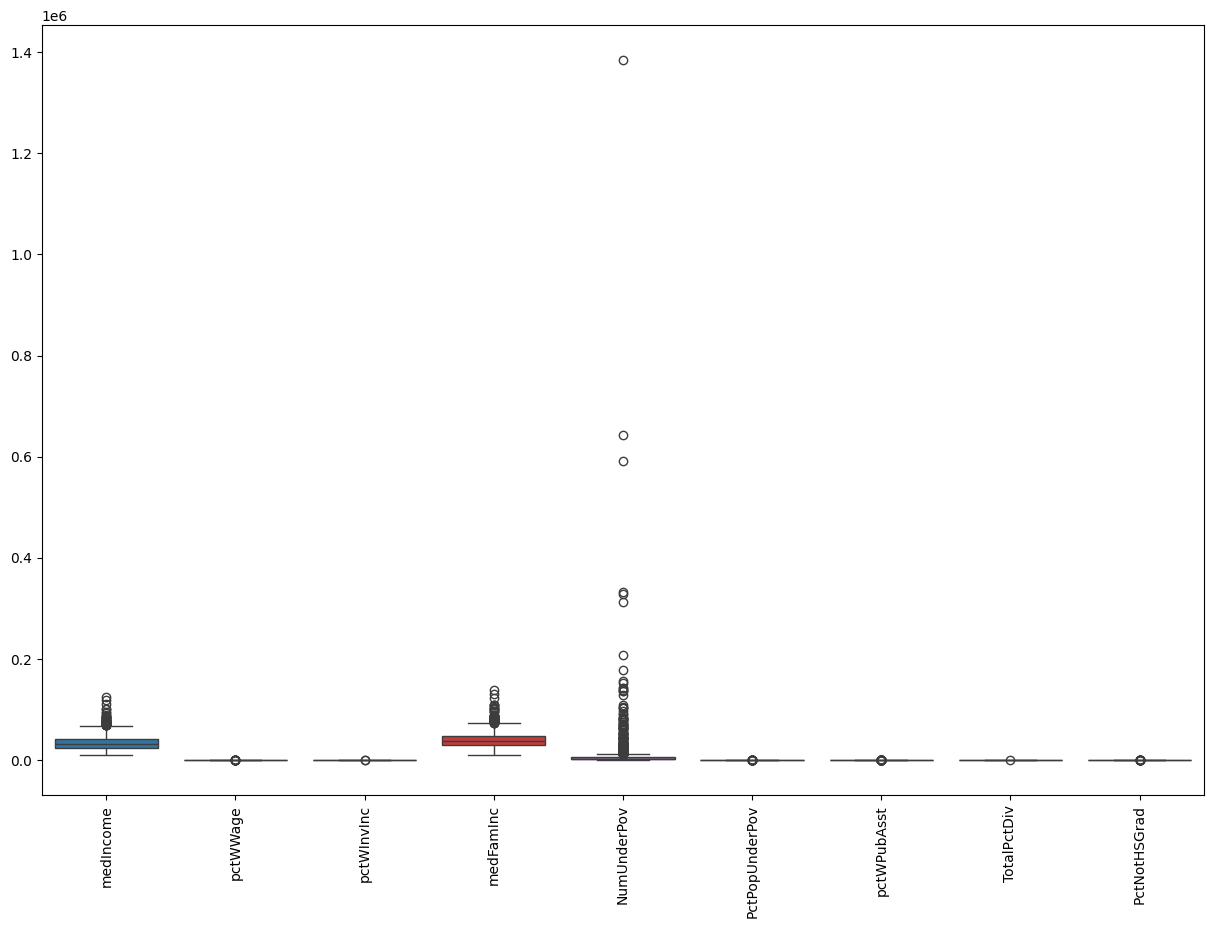

In [30]:
# Boxplot for each column to visualize outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=onlyIncome)
plt.xticks(rotation=90)
plt.show()

- most obvious outliers seem to be in the NumUnderPov category

In [31]:
# Calculate Z-scores for numerical columns
z_scores = stats.zscore(onlyIncome)

# Filter out rows with Z-scores greater than 3 or less than -3
onlyIncome_no_outliers = onlyIncome[(np.abs(z_scores) < 3).all(axis=1)]

- as explained earlier, z-score performed to identify and remove outliers

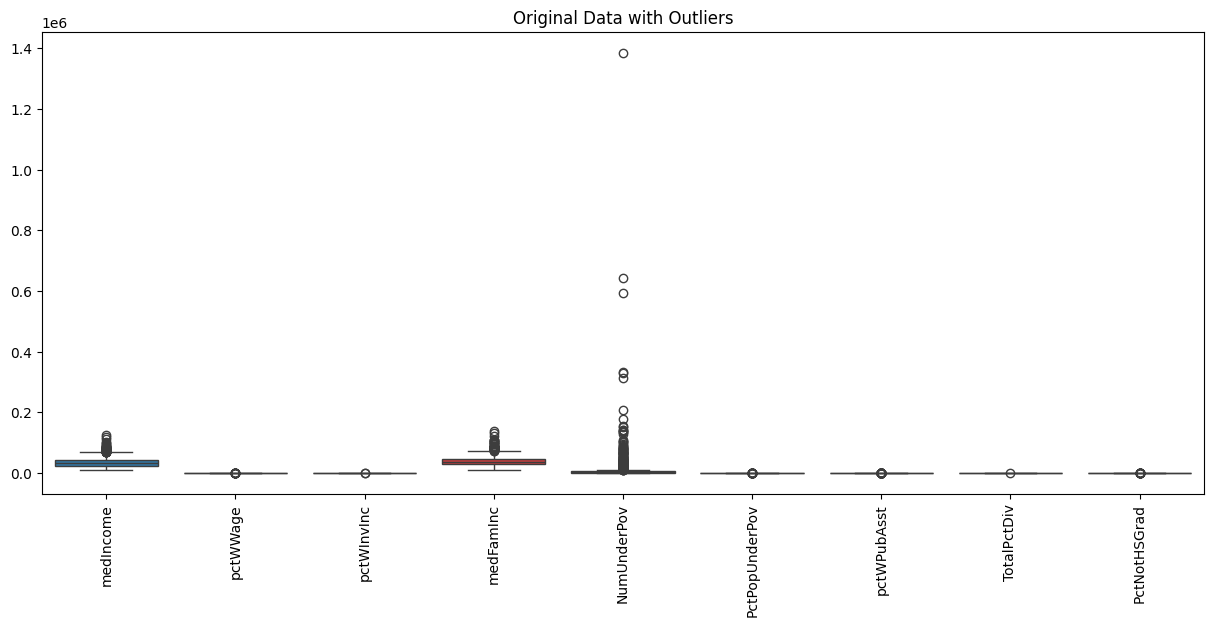

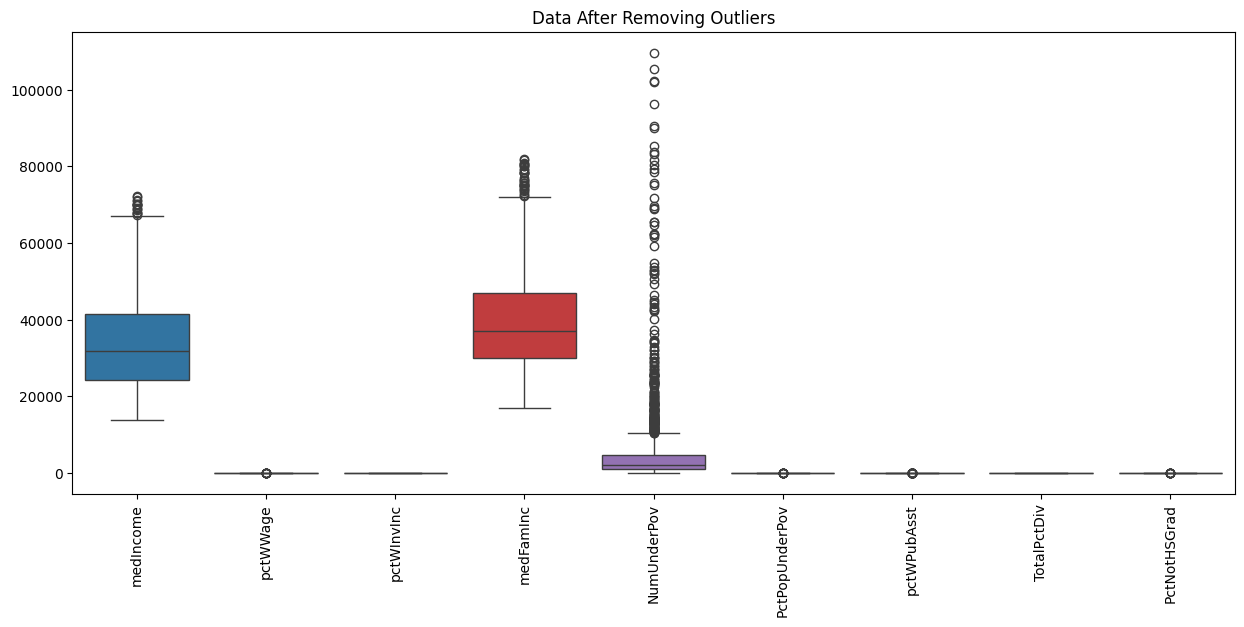

In [32]:
# Boxplot for the original data
plt.figure(figsize=(15, 6))
sns.boxplot(data=onlyIncome)
plt.title("Original Data with Outliers")
plt.xticks(rotation=90)
plt.show()

# Boxplot for the data without outliers
plt.figure(figsize=(15, 6))
sns.boxplot(data=onlyIncome_no_outliers.select_dtypes(include=[np.number]))
plt.title("Data After Removing Outliers")
plt.xticks(rotation=90)
plt.show()

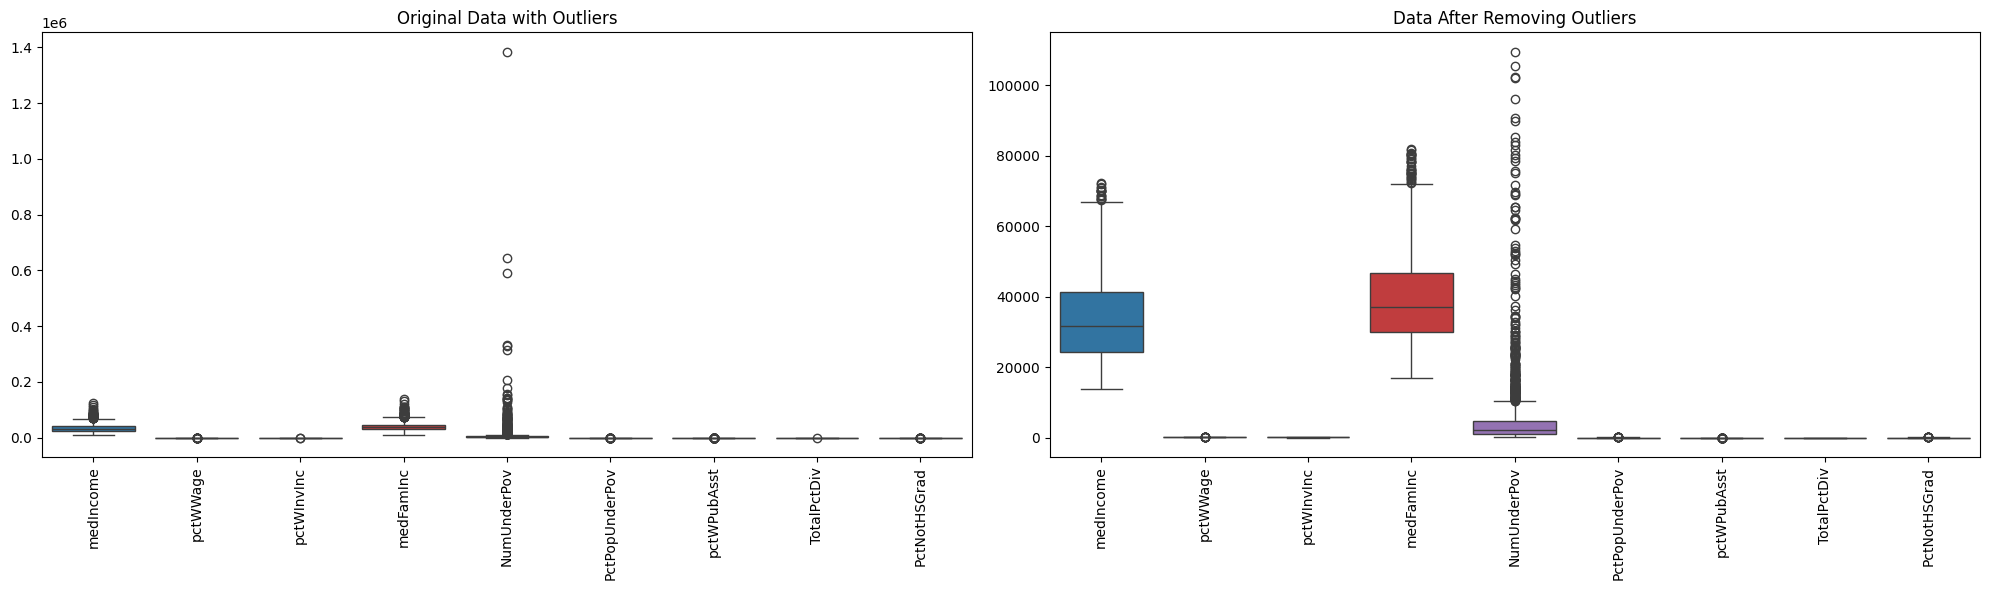

In [33]:
# Create a figure and two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Boxplot for the original data with outliers
sns.boxplot(data=onlyIncome, ax=axes[0])
axes[0].set_title("Original Data with Outliers")
axes[0].tick_params(axis='x', rotation=90)

# Boxplot for the data without outliers
sns.boxplot(data=onlyIncome_no_outliers.select_dtypes(include=[np.number]), ax=axes[1])
axes[1].set_title("Data After Removing Outliers")
axes[1].tick_params(axis='x', rotation=90)

# Display the plots
plt.tight_layout()
plt.show()

- visualizing to make sure that we got the intended outcome while removing outliers

In [34]:
print(onlyIncome.shape)
print(onlyIncome_no_outliers.shape)


(2215, 9)
(2093, 9)


- removed 111 outliers (~5% of data)

### Visualizing Distributions

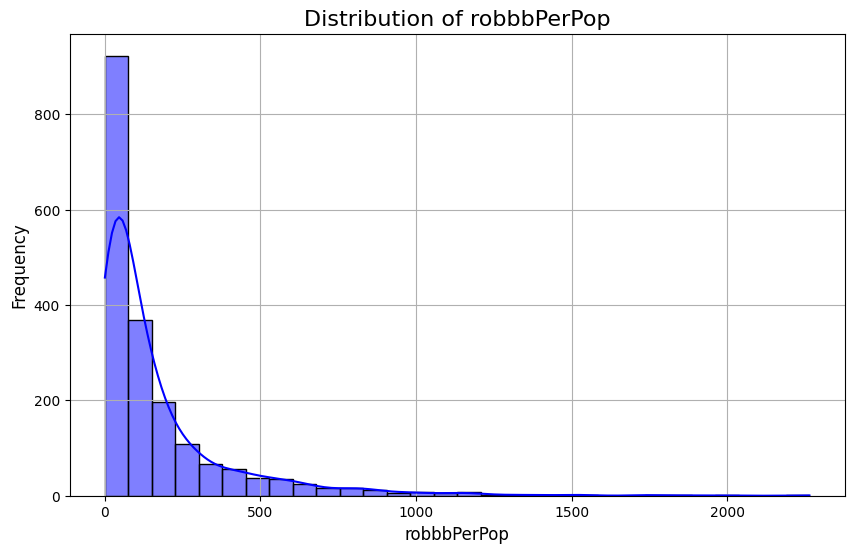

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(onlyCrime['robbbPerPop'], kde=True, bins=30, color='blue')
plt.title('Distribution of robbbPerPop', fontsize=16)
plt.xlabel('robbbPerPop', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

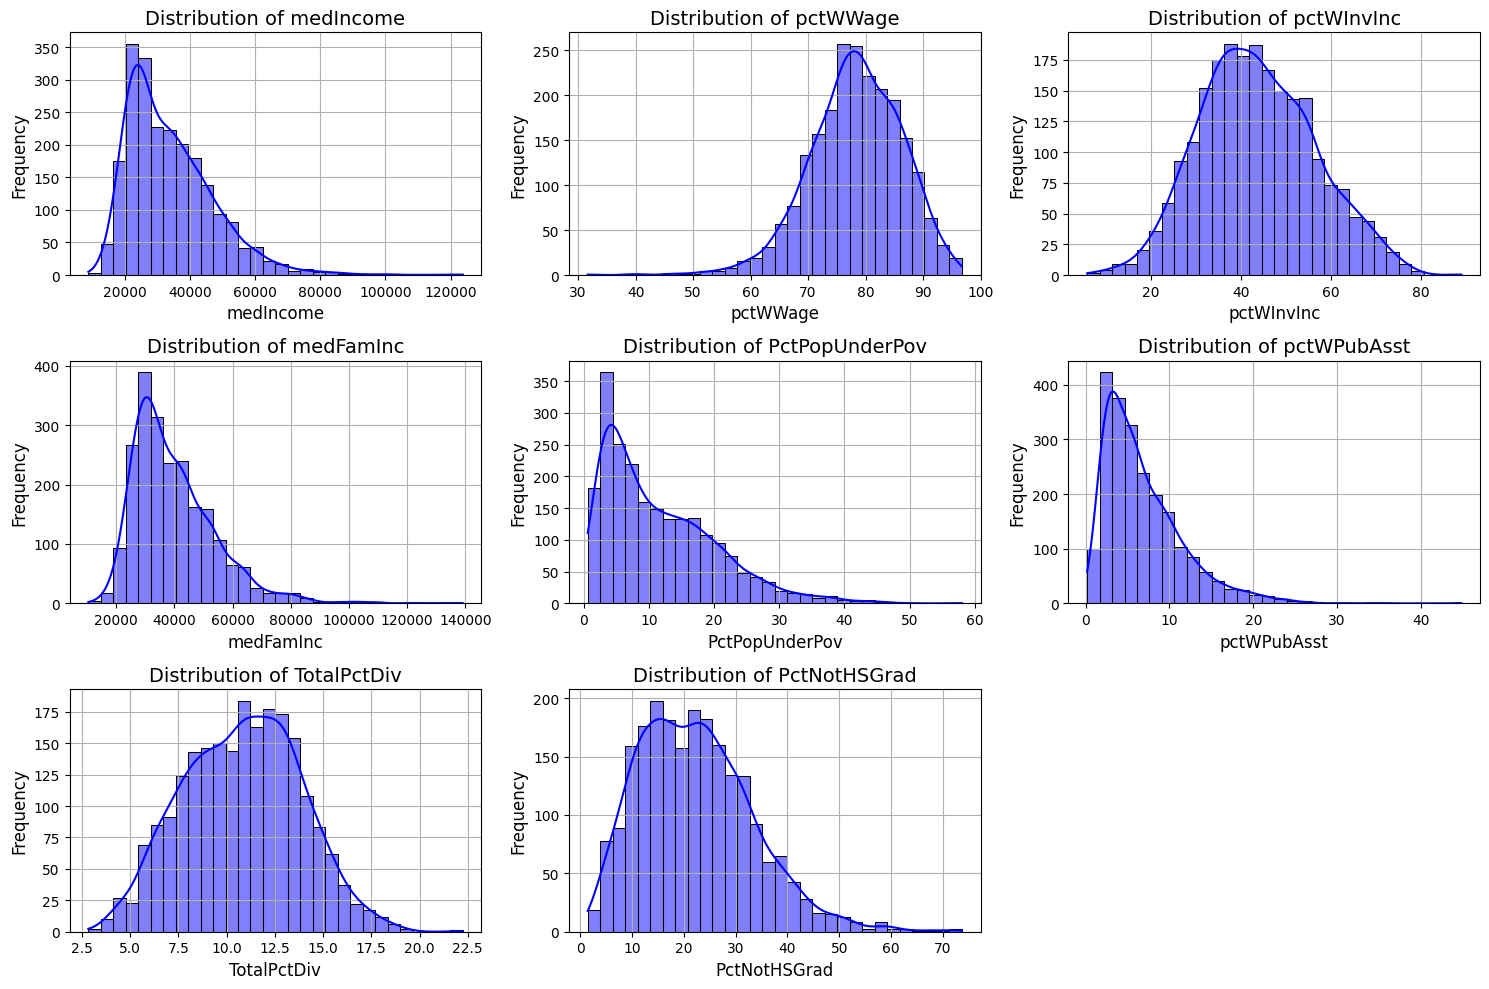

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of predictor variables
predictor_vars = [
    'medIncome',
    'pctWWage',
    'pctWInvInc',
    'medFamInc',
    'PctPopUnderPov',
    'pctWPubAsst',
    'TotalPctDiv',
    'PctNotHSGrad'
]

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Create a subplot for each predictor variable
for i, var in enumerate(predictor_vars, 1):
    plt.subplot(3, 3, i)  # Adjust the layout as needed
    sns.histplot(onlyIncome[var], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {var}', fontsize=14)
    plt.xlabel(var, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(True)

plt.tight_layout()
plt.show()


In [37]:
fullDF = pd.concat([onlyIncome, onlyCrime], axis=1)
fullDF.head()
fullDF.columns

Index(['medIncome', 'pctWWage', 'pctWInvInc', 'medFamInc', 'NumUnderPov',
       'PctPopUnderPov', 'pctWPubAsst', 'TotalPctDiv', 'PctNotHSGrad',
       'PctNotHSGrad', 'ViolentCrimesPerPop', 'nonViolPerPop', 'arsonsPerPop',
       'autoTheftPerPop', 'larcPerPop', 'burglPerPop', 'assaultPerPop',
       'robbbPerPop', 'rapesPerPop', 'murdPerPop'],
      dtype='object')

In [38]:
#drop 9th index of fullDF
fullDF = fullDF.loc[:, ~fullDF.columns.duplicated()]
columns_to_drop = ['ViolentCrimesPerPop', 'nonViolPerPop', 'arsonsPerPop', 'autoTheftPerPop', 
                   'larcPerPop', 'burglPerPop', 'assaultPerPop', 
                   'rapesPerPop', 'murdPerPop']
fullDF = fullDF.drop(columns=columns_to_drop)
fullDF.columns
fullDF['PctNotHSGrad']

0        9.90
1       13.72
2        9.09
3       33.68
4       23.06
        ...  
2210    30.87
2211    27.71
2212    26.14
2213    39.63
2214    33.68
Name: PctNotHSGrad, Length: 2215, dtype: float64

In [39]:
fullDF.head()

,medIncome,pctWWage,pctWInvInc,medFamInc,NumUnderPov,PctPopUnderPov,pctWPubAsst,TotalPctDiv,PctNotHSGrad,robbbPerPop
0,75122,89.24,70.20,79584,227,1.96,1.03,4.47,9.90,8.20
1,47917,78.99,64.11,55323,885,3.98,2.75,5.42,13.72,21.26
2,35669,82.00,55.73,42112,1389,4.75,2.94,12.55,9.09,154.95
3,20580,68.15,38.95,26501,2831,17.23,11.71,12.91,33.68,NaN
4,17390,69.33,42.82,24018,2855,29.99,11.21,9.73,23.06,NaN


In [40]:
fullDF = fullDF.dropna()
fullDF.isna().sum()

medIncome         0
pctWWage          0
pctWInvInc        0
medFamInc         0
NumUnderPov       0
PctPopUnderPov    0
pctWPubAsst       0
TotalPctDiv       0
PctNotHSGrad      0
robbbPerPop       0
dtype: int64

### BASELINE Model

- get the mean of our y (robberies per pop) and create a colum in the DF full of those values

In [41]:
fullDF.columns

Index(['medIncome', 'pctWWage', 'pctWInvInc', 'medFamInc', 'NumUnderPov',
       'PctPopUnderPov', 'pctWPubAsst', 'TotalPctDiv', 'PctNotHSGrad',
       'robbbPerPop'],
      dtype='object')

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

#gets the mean of our y target column (166.77) 
meanTarget = fullDF['robbbPerPop'].mean()
print(meanTarget) #make sure it matches the mean in the above y.describe()

# Makes it the same shape as y_test
baseline_predictions = [meanTarget] * len(fullDF['robbbPerPop'])
 
#Checking to make sure the size are the same for each this new column and our original target
print("Size of the new Mean column: ", len(baseline_predictions))
print("Size of the originally target column: ", len(fullDF['robbbPerPop']))

# Evaluate the baseline model (which always predicts the mean)
mae_baseline = mean_absolute_error(fullDF['robbbPerPop'], baseline_predictions)
mse_baseline = mean_squared_error(fullDF['robbbPerPop'], baseline_predictions)
rmse_baseline = mean_squared_error(fullDF['robbbPerPop'], baseline_predictions, squared=False)

#Print the baseline model's performance
print("Baseline Mean Absolute Error (MAE):", mae_baseline)
print("Baseline Mean Squared Error (MSE):", mse_baseline)
print("Baseline Root Mean Squared Error (RMSE):", rmse_baseline)


166.76597266035753
Size of the new Mean column:  1902
Size of the originally target column:  1902
Baseline Mean Absolute Error (MAE): 154.47772129840635
Baseline Mean Squared Error (MSE): 55818.254928154885
Baseline Root Mean Squared Error (RMSE): 236.2588726972066


### Visualizing the baseline model

### Getting baseline model summary statistics

In [44]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculating R-squared
r_squared = lr.score(X_test, y_test)

# Calculating Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# Summary statistics
print("Summary Statistics for Baseline Linear Regression Model")
print(f"R-squared: {r_squared:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")


NameError: name 'lr' is not defined

### Baseline model using only the averages of Robberies Per Population compared with the actual values

In [45]:
# Calculate the mean of 'robbbPerPop'
mean_robbb_per_pop = fullDF['robbbPerPop'].mean()

#  creates a list where every prediction is the same as mean_robbb_per_pop
baseline_predictions = [mean_robbb_per_pop] * len(fullDF)

# Calculate the Mean Absolute Error (MAE) comparing the baseline above with the absolute value of the actual values
mae = (abs(fullDF['robbbPerPop'] - baseline_predictions)).mean()

#prints the mean absolute error
print("Mean Absolute Error:", mae)

Mean Absolute Error: 154.47772129840635


- The MAE measures the average magnitude of the errors between the predictions and the actual values, without considering their direction (i.e., whether they are positive or negative).
- A value of 154.48 indicates that, on average, each prediction using the mean is off by 154.48 compared to the actual robbery rates per population.
- lower MAE is the goal that we will try to accomplish with our actual model.

In [46]:
fullDF = fullDF.dropna()
fullDF.isna().sum()
fullDF.head(
    
)

,medIncome,pctWWage,pctWInvInc,medFamInc,NumUnderPov,PctPopUnderPov,pctWPubAsst,TotalPctDiv,PctNotHSGrad,robbbPerPop
0,75122,89.24,70.20,79584,227,1.96,1.03,4.47,9.90,8.20
1,47917,78.99,64.11,55323,885,3.98,2.75,5.42,13.72,21.26
2,35669,82.00,55.73,42112,1389,4.75,2.94,12.55,9.09,154.95
5,21577,75.78,41.15,27705,23223,17.78,7.12,13.04,23.03,90.05
6,42805,79.47,47.70,50394,1126,4.01,5.41,7.64,13.89,30.44


In [47]:
X = fullDF.drop(columns=['NumUnderPov', fullDF.columns[-1]])
print("Features in X:")
print(X.columns.tolist())
y = fullDF.iloc[:, -1]
print("Target in y:")
print(y.name)

Features in X:
['medIncome', 'pctWWage', 'pctWInvInc', 'medFamInc', 'PctPopUnderPov', 'pctWPubAsst', 'TotalPctDiv', 'PctNotHSGrad']
Target in y:
robbbPerPop


### Cart Model

In [48]:
from sklearn.tree import DecisionTreeRegressor

# Train-test split with X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#creating the CART model
cartModel = DecisionTreeRegressor()
cartModel.fit(X_train, y_train)
y_pred = cartModel.predict(X_test)

# Printing Results
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", mean_squared_error(y_test, y_pred, squared=False)) #squared = False returns the Root


# Calculating and printing R-squared value
r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)

Mean Absolute Error: 134.25658792650918
Mean Squared Error: 61020.370604199474
Root Mean Squared Error: 247.0230163450351


NameError: name 'r2_score' is not defined

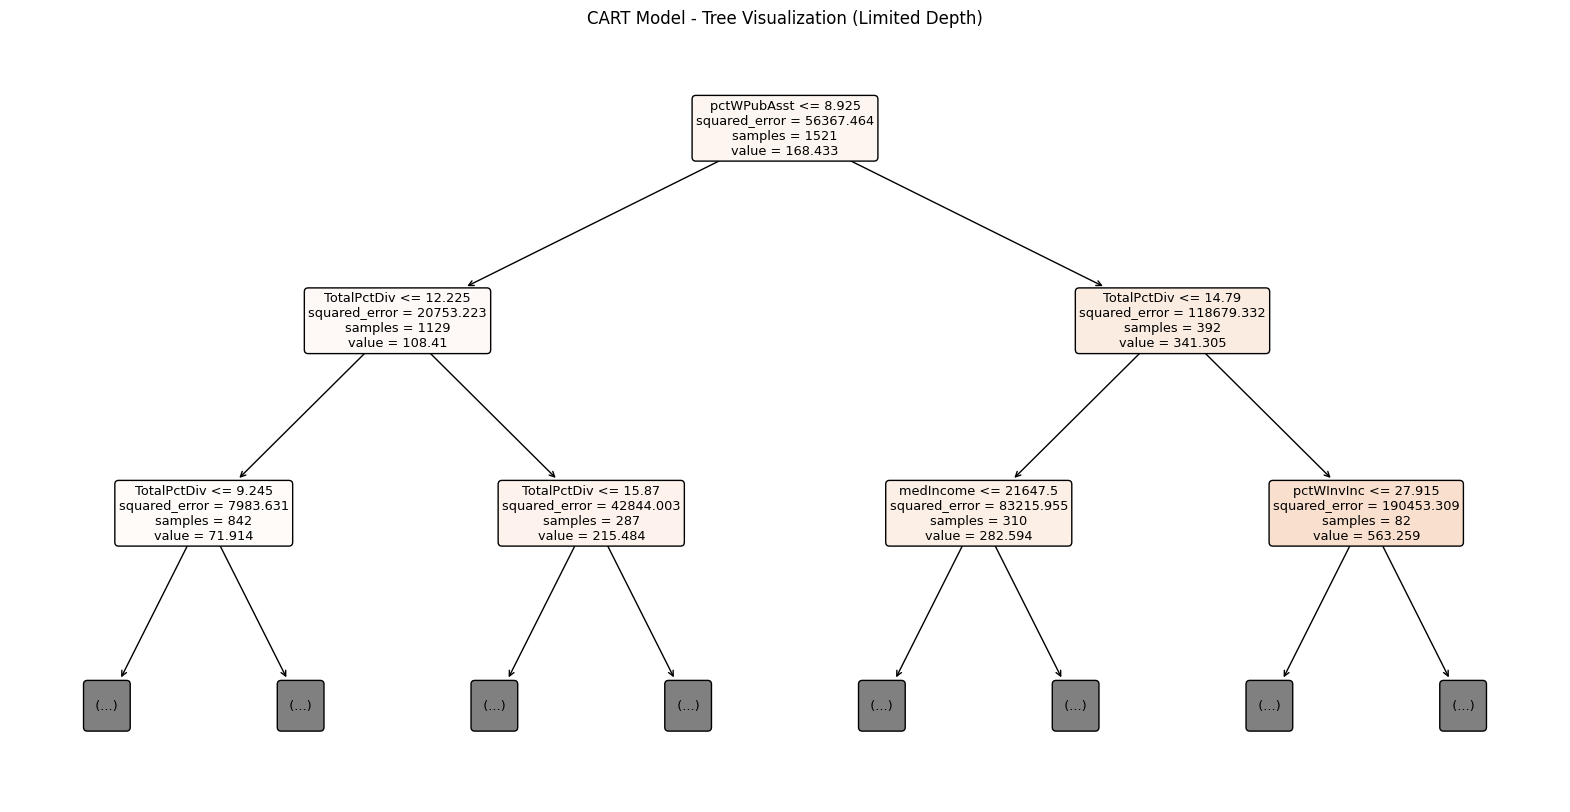

In [ ]:
#import plot tree
from sklearn.tree import plot_tree
# Set the maximum depth for visualization
max_depth = 2  # Change this value to limit the depth further if needed

# Plotting the tree from the CART model with limited depth
plt.figure(figsize=(20, 10))  # Set the size of the figure
plot_tree(cartModel, filled=True, feature_names=X.columns, rounded=True, max_depth=max_depth)
plt.title("CART Model - Tree Visualization (Limited Depth)")
plt.show()

### Random Forest Model

In [49]:
#random forest regressor
from sklearn.ensemble import RandomForestRegressor

#creating random
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

#print results 
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", mean_squared_error(y_test, y_pred, squared=False)) #squared = False returns the Root


# Calculating and printing R-squared value
r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)

Mean Absolute Error: 106.17808267716535
Mean Squared Error: 31521.333741347953
Root Mean Squared Error: 177.54248432797135


NameError: name 'r2_score' is not defined

In [ ]:
from sklearn.model_selection import cross_validate  # Add this import
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error
import numpy as np

# Define custom scoring metrics for cross-validation
scoring = {
    'MAE': make_scorer(mean_absolute_error),
    'MSE': make_scorer(mean_squared_error),
    'RMSE': make_scorer(mean_squared_error, squared=False)
}

# Perform cross-validation
cv_results = cross_validate(rf, X_train, y_train, cv=5, scoring=scoring)

# Print cross-validation results
print("Cross-Validation Mean Absolute Error (MAE):", np.mean(cv_results['test_MAE']))
print("Cross-Validation Mean Squared Error (MSE):", np.mean(cv_results['test_MSE']))
print("Cross-Validation Root Mean Squared Error (RMSE):", np.mean(cv_results['test_RMSE']))


Cross-Validation Mean Absolute Error (MAE): 94.20321351509922
Cross-Validation Mean Squared Error (MSE): 24046.076465980335
Cross-Validation Root Mean Squared Error (RMSE): 154.74334090502902
R-squared: 0.4849597842668373


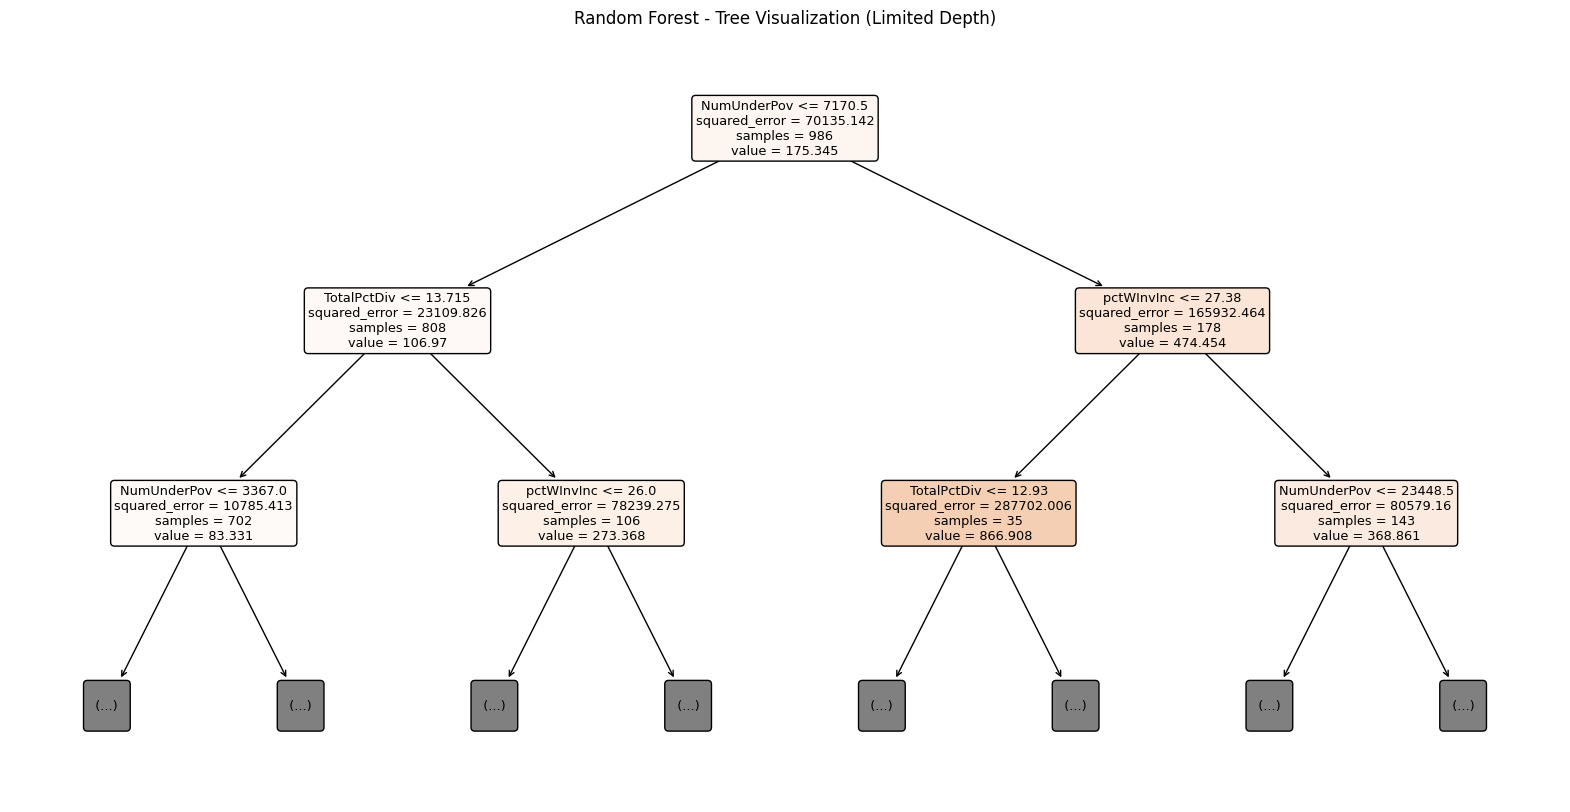

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


# Set the maximum depth for visualization
max_depth = 2  # Change this value to limit the depth further if needed

# Plotting the first tree in the Random Forest with limited depth
plt.figure(figsize=(20, 10))  # Set the size of the figure
plot_tree(rf.estimators_[0], filled=True, feature_names=X.columns, rounded=True, max_depth=max_depth)
plt.title("Random Forest - Tree Visualization (Limited Depth)")
plt.show()


### Naive Bayes Model

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import BayesianRidge
import numpy as np

# Initialize the Bayesian Ridge regression model
bayesRidgeModel = BayesianRidge()

# Train-test split with X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Bayesian Ridge model
bayesRidgeModel.fit(X_train, y_train)

# Predicting the target values
y_pred = bayesRidgeModel.predict(X_test)

# Evaluating the model on test data
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", mean_squared_error(y_test, y_pred, squared=False))

# Calculate and print R-squared value on test data
r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)

# Define custom scoring metrics for cross-validation
scoring = {
    'MAE': make_scorer(mean_absolute_error),
    'MSE': make_scorer(mean_squared_error),
    'RMSE': make_scorer(mean_squared_error, squared=False),
    'R2': 'r2'
}

# Perform 10-fold cross-validation
cv_results = cross_validate(bayesRidgeModel, X, y, cv=10, scoring=scoring)

# Print cross-validation results
print("Cross-Validation Mean Absolute Error (MAE):", np.mean(cv_results['test_MAE']))
print("Cross-Validation Mean Squared Error (MSE):", np.mean(cv_results['test_MSE']))
print("Cross-Validation Root Mean Squared Error (RMSE):", np.mean(cv_results['test_RMSE']))
print("Cross-Validation R-squared (R2):", np.mean(cv_results['test_R2']))


Mean Absolute Error: 124.92196089764471
Mean Squared Error: 37837.4070973832
Root Mean Squared Error: 194.5183978377963
R-squared: 0.2936875716514158
Cross-Validation Mean Absolute Error (MAE): 125.21530668188248
Cross-Validation Mean Squared Error (MSE): 37723.85135558673
Cross-Validation Root Mean Squared Error (RMSE): 192.77499154910137
Cross-Validation R-squared (R2): 0.3208598054173376


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error
import numpy as np

# Initialize the linear regression model
lrModel = LinearRegression()

# Define custom scoring metrics for cross-validation, including R-squared
scoring = {
    'MAE': make_scorer(mean_absolute_error),
    'MSE': make_scorer(mean_squared_error),
    'RMSE': make_scorer(mean_squared_error, squared=False),
    'R2': 'r2'  # R-squared is already a valid scoring metric in sklearn
}

# Perform cross-validation
cv_results = cross_validate(lrModel, X_train, y_train, cv=10, scoring=scoring)

# Print cross-validation results
print("Cross-Validation Mean Absolute Error (MAE):", np.mean(cv_results['test_MAE']))
print("Cross-Validation Mean Squared Error (MSE):", np.mean(cv_results['test_MSE']))
print("Cross-Validation Root Mean Squared Error (RMSE):", np.mean(cv_results['test_RMSE']))
print("Cross-Validation R-squared (R2):", np.mean(cv_results['test_R2']))


Cross-Validation Mean Absolute Error (MAE): 126.33147770698979
Cross-Validation Mean Squared Error (MSE): 37770.96907597972
Cross-Validation Root Mean Squared Error (RMSE): 192.63263784989323
Cross-Validation R-squared (R2): 0.3077224148439502


### Decision Tree

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
import numpy as np

# Initialize the Decision Tree Regressor
dtModel = DecisionTreeRegressor(random_state=42)

# Train-test split with X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Decision Tree model
dtModel.fit(X_train, y_train)

# Predicting the target values
y_pred = dtModel.predict(X_test)

# Evaluating the model on test data
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", mean_squared_error(y_test, y_pred, squared=False))

# Calculate and print R-squared value on test data
r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)

# Define custom scoring metrics for cross-validation
scoring = {
    'MAE': make_scorer(mean_absolute_error),
    'MSE': make_scorer(mean_squared_error),
    'RMSE': make_scorer(mean_squared_error, squared=False),
    'R2': 'r2'
}

# Perform cross-validation with 10 folds
cv_results = cross_validate(dtModel, X, y, cv=10, scoring=scoring)

# Print cross-validation results
print("Cross-Validation Mean Absolute Error (MAE):", np.mean(cv_results['test_MAE']))
print("Cross-Validation Mean Squared Error (MSE):", np.mean(cv_results['test_MSE']))
print("Cross-Validation Root Mean Squared Error (RMSE):", np.mean(cv_results['test_RMSE']))
print("Cross-Validation R-squared (R2):", np.mean(cv_results['test_R2']))


Mean Absolute Error: 127.07658792650919
Mean Squared Error: 52346.60661154857
Root Mean Squared Error: 228.79380807082293
R-squared: 0.022843749931058532
Cross-Validation Mean Absolute Error (MAE): 140.64770509782312
Cross-Validation Mean Squared Error (MSE): 60530.758949525494
Cross-Validation Root Mean Squared Error (RMSE): 243.37792087528402
Cross-Validation R-squared (R2): -0.09586010734250379


In [ ]:
# Define custom scoring metrics for cross-validation
scoring = {
    'MAE': make_scorer(mean_absolute_error),
    'MSE': make_scorer(mean_squared_error),
    'RMSE': make_scorer(mean_squared_error, squared=False)
}

# Perform cross-validation
cv_results = cross_validate(dtModel, X_train, y_train, cv=5, scoring=scoring)

# Print cross-validation results
print("Cross-Validation Mean Absolute Error (MAE):", np.mean(cv_results['test_MAE']))
print("Cross-Validation Mean Squared Error (MSE):", np.mean(cv_results['test_MSE']))
print("Cross-Validation Root Mean Squared Error (RMSE):", np.mean(cv_results['test_RMSE']))

Cross-Validation Mean Absolute Error (MAE): 136.25052771786022
Cross-Validation Mean Squared Error (MSE): 60694.81868783757
Cross-Validation Root Mean Squared Error (RMSE): 245.8019153794807


### multiple linear regression

In [50]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import numpy as np

# Create the Linear Regression model
lrModel = LinearRegression()
lrModel.fit(X_train, y_train)

# Predicting the target values
y_pred = lrModel.predict(X_test)

# Evaluating the model on test data
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", mean_squared_error(y_test, y_pred, squared=False))

# Calculate and print R-squared value on test data
r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)

# Define custom scoring metrics for cross-validation
scoring = {
    'MAE': make_scorer(mean_absolute_error),
    'MSE': make_scorer(mean_squared_error),
    'RMSE': make_scorer(mean_squared_error, squared=False),
    'R2': 'r2'
}

# Perform cross-validation with 10 folds
cv_results = cross_validate(lrModel, X, y, cv=10, scoring=scoring)

# Print cross-validation results
print("Cross-Validation Mean Absolute Error (MAE):", np.mean(cv_results['test_MAE']))
print("Cross-Validation Mean Squared Error (MSE):", np.mean(cv_results['test_MSE']))
print("Cross-Validation Root Mean Squared Error (RMSE):", np.mean(cv_results['test_RMSE']))
print("Cross-Validation R-squared (R2):", np.mean(cv_results['test_R2']))



Mean Absolute Error: 125.04319452053443
Mean Squared Error: 37864.09200596591
Root Mean Squared Error: 194.58697799689966
R-squared: 0.2931894433697181
Cross-Validation Mean Absolute Error (MAE): 125.52995434730708
Cross-Validation Mean Squared Error (MSE): 37726.610022359106
Cross-Validation Root Mean Squared Error (RMSE): 192.79601873959234
Cross-Validation R-squared (R2): 0.32060846901682316


In [51]:
# Define custom scoring metrics for cross-validation
scoring = {
    'MAE': make_scorer(mean_absolute_error),
    'MSE': make_scorer(mean_squared_error),
    'RMSE': make_scorer(mean_squared_error, squared=False)
}

# Perform cross-validation
cv_results = cross_validate(lrModel, X_train, y_train, cv=5, scoring=scoring)

# Print cross-validation results
print("Cross-Validation Mean Absolute Error (MAE):", np.mean(cv_results['test_MAE']))
print("Cross-Validation Mean Squared Error (MSE):", np.mean(cv_results['test_MSE']))
print("Cross-Validation Root Mean Squared Error (RMSE):", np.mean(cv_results['test_RMSE']))

Cross-Validation Mean Absolute Error (MAE): 126.58680633809297
Cross-Validation Mean Squared Error (MSE): 37729.72154091846
Cross-Validation Root Mean Squared Error (RMSE): 193.81575976446146


### Gradient Boosted Predictive Model

In [52]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize the Gradient Boosting Regressor model
gbModel = GradientBoostingRegressor(random_state=42)

# Train-test split with X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Gradient Boosting model
gbModel.fit(X_train, y_train)

# Predicting the target values
y_pred = gbModel.predict(X_test)

# Evaluating the model on test data
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", mean_squared_error(y_test, y_pred, squared=False))

# Calculate and print R-squared value on test data
r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)

# Define custom scoring metrics for cross-validation
scoring = {
    'MAE': make_scorer(mean_absolute_error),
    'MSE': make_scorer(mean_squared_error),
    'RMSE': make_scorer(mean_squared_error, squared=False),
    'R2': 'r2'
}

# Perform 10-fold cross-validation
cv_results = cross_validate(gbModel, X, y, cv=10, scoring=scoring)

# Print cross-validation results
print("Cross-Validation Mean Absolute Error (MAE):", np.mean(cv_results['test_MAE']))
print("Cross-Validation Mean Squared Error (MSE):", np.mean(cv_results['test_MSE']))
print("Cross-Validation Root Mean Squared Error (RMSE):", np.mean(cv_results['test_RMSE']))
print("Cross-Validation R-squared (R2):", np.mean(cv_results['test_R2']))


Mean Absolute Error: 100.44340586512968
Mean Squared Error: 30142.582822121807
Root Mean Squared Error: 173.6161940088591
R-squared: 0.43732717162684287
Cross-Validation Mean Absolute Error (MAE): 103.38813809974496
Cross-Validation Mean Squared Error (MSE): 30963.4922128773
Cross-Validation Root Mean Squared Error (RMSE): 174.32710957190633
Cross-Validation R-squared (R2): 0.4442329810376803


In [53]:
# Define custom scoring metrics for cross-validation
scoring = {
    'MAE': make_scorer(mean_absolute_error),
    'MSE': make_scorer(mean_squared_error),
    'RMSE': make_scorer(mean_squared_error, squared=False)
}

# Perform cross-validation
cv_results = cross_validate(gbModel, X_train, y_train, cv=5, scoring=scoring)

# Print cross-validation results
print("Cross-Validation Mean Absolute Error (MAE):", np.mean(cv_results['test_MAE']))
print("Cross-Validation Mean Squared Error (MSE):", np.mean(cv_results['test_MSE']))
print("Cross-Validation Root Mean Squared Error (RMSE):", np.mean(cv_results['test_RMSE']))


Cross-Validation Mean Absolute Error (MAE): 104.52761815233733
Cross-Validation Mean Squared Error (MSE): 31009.36834023961
Cross-Validation Root Mean Squared Error (RMSE): 175.67659090809505


### Checking for overfitting/underfitting

In [54]:
# Predict on training and test sets
y_train_pred = gbModel.predict(X_train)
y_test_pred = gbModel.predict(X_test)

# Calculate MAE, MSE, and RMSE on training set
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)

# Calculate MAE, MSE, and RMSE on test set
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

print(f"Training MAE: {train_mae}, Test MAE: {test_mae}")
print(f"Training MSE: {train_mse}, Test MSE: {test_mse}")
print(f"Training RMSE: {train_rmse}, Test RMSE: {test_rmse}")

Training MAE: 74.93549820202928, Test MAE: 100.44340586512968
Training MSE: 12689.348031652558, Test MSE: 30142.582822121807
Training RMSE: 112.64700631464893, Test RMSE: 173.6161940088591


- the test data has higher error levels than the training data. Due to this higher error in the test data, and lower error in the training data this indicated that perhaps our model is being negatively affected due to overfitting and this will be something that we will try to address in order to try to improve our model.


## ROC

In [55]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import make_scorer, mean_absolute_error


# Bayesian Ridge regression model
model = BayesianRidge()


scoring = make_scorer(mean_absolute_error)


cv_scores = cross_val_score(model, X, y, cv=10, scoring=scoring)


print("Cross-validation with k=10:", cv_scores)
print("Average score of all folds:", cv_scores.mean())





from sklearn.metrics import r2_score, mean_squared_error


# R-squared
r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)


# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)


# Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)





Cross-validation with k=10: [146.33897895 130.07529772 131.84700174 137.58970968 110.27948606
 122.79369194 107.80195598 128.58893293 124.26128986 112.57672196]
Average score of all folds: 125.21530668188248
R-squared: 0.43732717162684287
Mean Squared Error (MSE): 30142.582822121807
Root Mean Squared Error (RMSE): 173.6161940088591


In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Assuming X and y are already defined elsewhere in the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the decision tree model
dtModel = DecisionTreeRegressor(random_state=42)
dtModel.fit(X_train, y_train)

# Predictions
y_pred = dtModel.predict(X_test)

# Uncomment the following if you're using a classification model
# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred, average='weighted')
# recall = recall_score(y_test, y_pred, average='weighted')
# f1 = f1_score(y_test, y_pred, average='weighted')
# print(f"Accuracy: {accuracy}")
# print(f"Precision: {precision}")
# print(f"Recall: {recall}")
# print(f"F1 Score: {f1}")

# K-Fold Cross-validation
k = 10
crossvalidation = KFold(n_splits=k, random_state=1, shuffle=True)
decision_cv_scores = cross_val_score(dtModel, X, y, cv=crossvalidation)

print("Decision Tree cross-validation scores with k=10: ", decision_cv_scores)
print("Average score of all folds:", decision_cv_scores.mean())

Decision Tree cross-validation scores with k=10:  [-0.02150517 -0.19357437  0.21283627 -0.12677551 -0.14258884 -0.26980033
 -0.94156592 -0.12291264 -0.13061057  0.20172996]
Average score of all folds: -0.15347671190297962


In [57]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Assuming X and y are already defined elsewhere in the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the decision tree model
dtModel = DecisionTreeRegressor(random_state=42)
dtModel.fit(X_train, y_train)

# Predictions
y_pred = dtModel.predict(X_test)

# K-Fold Cross-validation
k = 10
crossvalidation = KFold(n_splits=k, random_state=1, shuffle=True)
decision_cv_scores = cross_val_score(dtModel, X, y, cv=crossvalidation)

print("Decision Tree cross-validation scores with k=10: ", decision_cv_scores)
print("Average score of all folds:", decision_cv_scores.mean())

# R-squared
r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)


Decision Tree cross-validation scores with k=10:  [-0.02150517 -0.19357437  0.21283627 -0.12677551 -0.14258884 -0.26980033
 -0.94156592 -0.12291264 -0.13061057  0.20172996]
Average score of all folds: -0.15347671190297962
R-squared: 0.022843749931058532
Mean Squared Error (MSE): 52346.60661154857
Root Mean Squared Error (RMSE): 228.79380807082293


### K Means

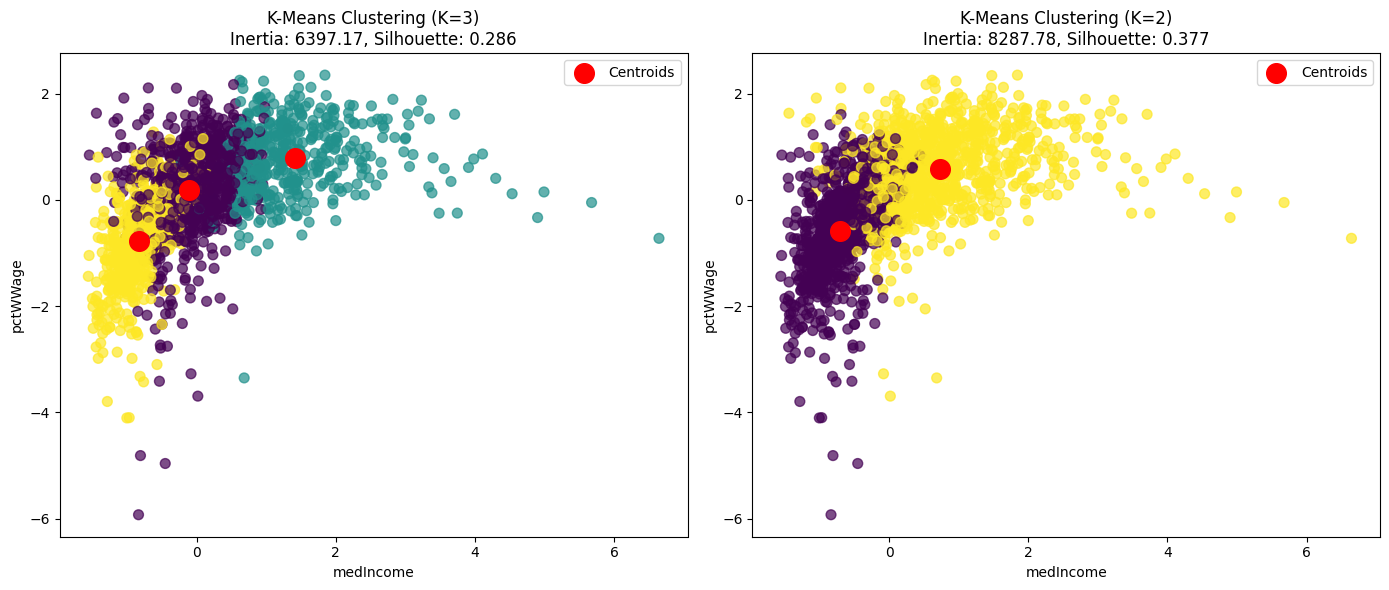

In [58]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit the K-Means model for K = 3
kmeans_3 = KMeans(n_clusters=3, random_state=42)
kmeans_3.fit(X_scaled)
clusters_3 = kmeans_3.labels_
inertia_3 = kmeans_3.inertia_
sil_score_3 = silhouette_score(X_scaled, clusters_3)

# Fit the K-Means model for K = 2
kmeans_2 = KMeans(n_clusters=2, random_state=42)
kmeans_2.fit(X_scaled)
clusters_2 = kmeans_2.labels_
inertia_2 = kmeans_2.inertia_
sil_score_2 = silhouette_score(X_scaled, clusters_2)

# Create subplots to display both visualizations side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for K = 3
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters_3, cmap='viridis', s=50, alpha=0.7)
axes[0].scatter(kmeans_3.cluster_centers_[:, 0], kmeans_3.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
axes[0].set_title(f"K-Means Clustering (K=3)\nInertia: {inertia_3:.2f}, Silhouette: {sil_score_3:.3f}")
axes[0].set_xlabel(X.columns[0])
axes[0].set_ylabel(X.columns[1])
axes[0].legend()

# Plot for K = 2
axes[1].scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters_2, cmap='viridis', s=50, alpha=0.7)
axes[1].scatter(kmeans_2.cluster_centers_[:, 0], kmeans_2.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
axes[1].set_title(f"K-Means Clustering (K=2)\nInertia: {inertia_2:.2f}, Silhouette: {sil_score_2:.3f}")
axes[1].set_xlabel(X.columns[0])
axes[1].set_ylabel(X.columns[1])
axes[1].legend()

# Display the plots
plt.tight_layout()
plt.show()


- Cluster 1 could represent regions with moderate to high crime and low income or high poverty. These areas might need social interventions to reduce crime and improve socio-economic conditions.
- Cluster 2 may represent areas with lower crime rates and moderate socio-economic conditions. These areas could be seen as "average" regions in terms of crime and socio-economic factors.
- Cluster 3 likely represents wealthier, low-crime regions with good socio-economic status, which may require policies to maintain their stability or address other issues not directly related to crime.

### Deciding the amount of clusters based off elbow and silhouette method

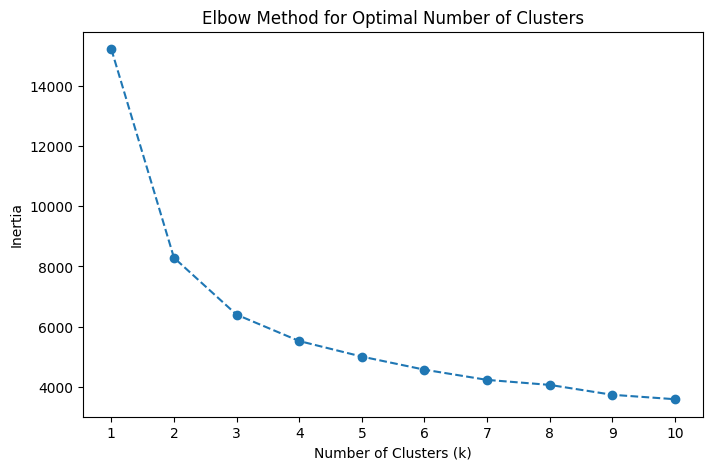

In [59]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Step 1: Compute inertia for different values of n_clusters
inertia_values = []
cluster_range = range(1, 11)  # Test 1 to 10 clusters

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

# Step 2: Plot the inertia values
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia_values, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(cluster_range)
plt.show()


- the elbow method indicates that perhaps 3 would be the best number of clusters due to that being the number where the 'elbow' is

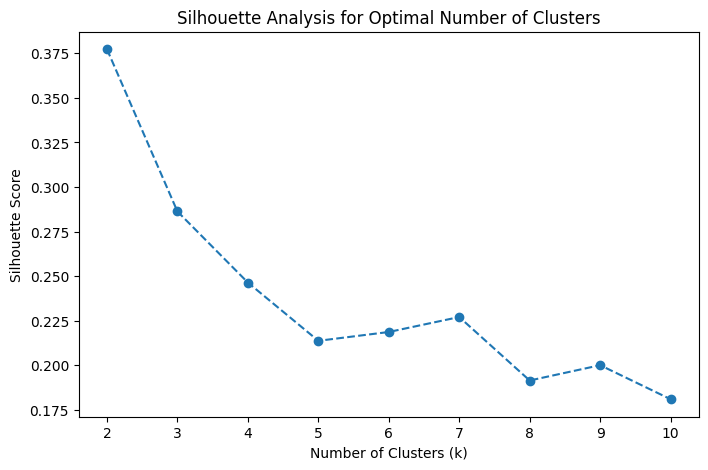

In [60]:
from sklearn.metrics import silhouette_score

# Step 1: Compute silhouette scores for different values of n_clusters
silhouette_scores = []

for k in cluster_range[1:]:  # Silhouette score is undefined for k=1
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    clusters = kmeans.labels_
    score = silhouette_score(X_scaled, clusters)
    silhouette_scores.append(score)

# Step 2: Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(cluster_range[1:], silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Analysis for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(cluster_range[1:])
plt.show()


- Silhouette analysis indicates that k=2 would be the most optimal due to it having the highest silhouette score of .375

In [61]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit the K-Means model
kmeans = KMeans(n_clusters=3, random_state=42)  # K = 3
kmeans.fit(X_scaled)

# Evaluate the clustering
clusters = kmeans.labels_
inertia = kmeans.inertia_  # Sum of squared distances of samples to their closest cluster center
sil_score = silhouette_score(X_scaled, clusters)

print(f"Inertia: {inertia}")
print(f"Silhouette Score: {sil_score}")


Inertia: 6397.172136164769
Silhouette Score: 0.28628004915223665


In [62]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit the K-Means model
kmeans = KMeans(n_clusters=2, random_state=42)  # k = 2
kmeans.fit(X_scaled)

# Evaluate the clustering
clusters = kmeans.labels_
inertia = kmeans.inertia_  # Sum of squared distances of samples to their closest cluster center
sil_score = silhouette_score(X_scaled, clusters)

print(f"Inertia: {inertia}")
print(f"Silhouette Score: {sil_score}")

Inertia: 8287.784202405803
Silhouette Score: 0.3773246802831602


- Inertia is a measure of how well the data points are clustered around the centroids. Lower inertia indicates that the clusters are more compact and the model is a better fit.
- The Silhouette Score measures how well-separated the clusters are. A score closer to 1 indicates that the clusters are well-separated, while a score close to 0 suggests that the clusters are overlapping.

- Based on inertia, K=3 is the better choice as it results in more compact clusters (better fit).
- But based off silhouette score K=2 offers slightly better separation between clusters.

#### individual visuals for K=3 and K=2

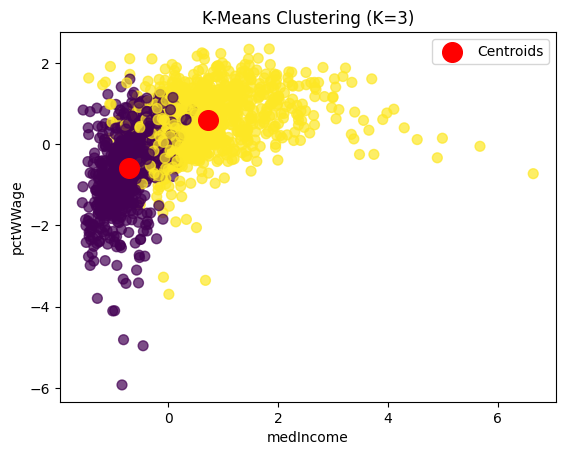

In [63]:
# Map feature indices to their original names
feature_1_name = X.columns[0]  # First feature in the DataFrame
feature_2_name = X.columns[1]  # Second feature in the DataFrame

# Visualize the clustering with proper labels
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', s=50, alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
plt.title("K-Means Clustering (K=3)")
plt.xlabel(feature_1_name)  # Use the actual name of Feature 1
plt.ylabel(feature_2_name)  # Use the actual name of Feature 2
plt.legend()
plt.show()

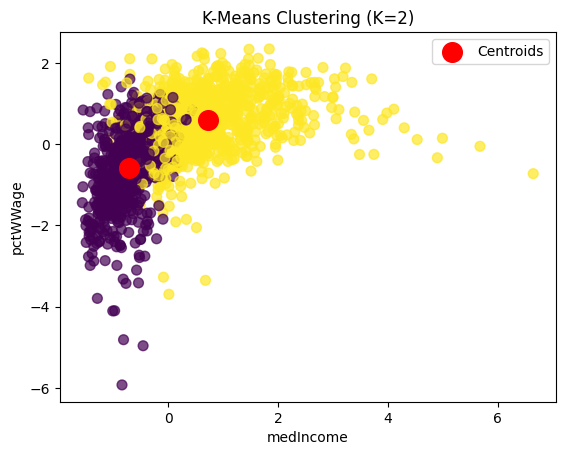

In [64]:
# Map feature indices to their original names
feature_1_name = X.columns[0]  # First feature in the DataFrame
feature_2_name = X.columns[1]  # Second feature in the DataFrame

# Visualize the clustering with proper labels
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', s=50, alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
plt.title("K-Means Clustering (K=2)")
plt.xlabel(feature_1_name)  # Use the actual name of Feature 1
plt.ylabel(feature_2_name)  # Use the actual name of Feature 2
plt.legend()
plt.show()

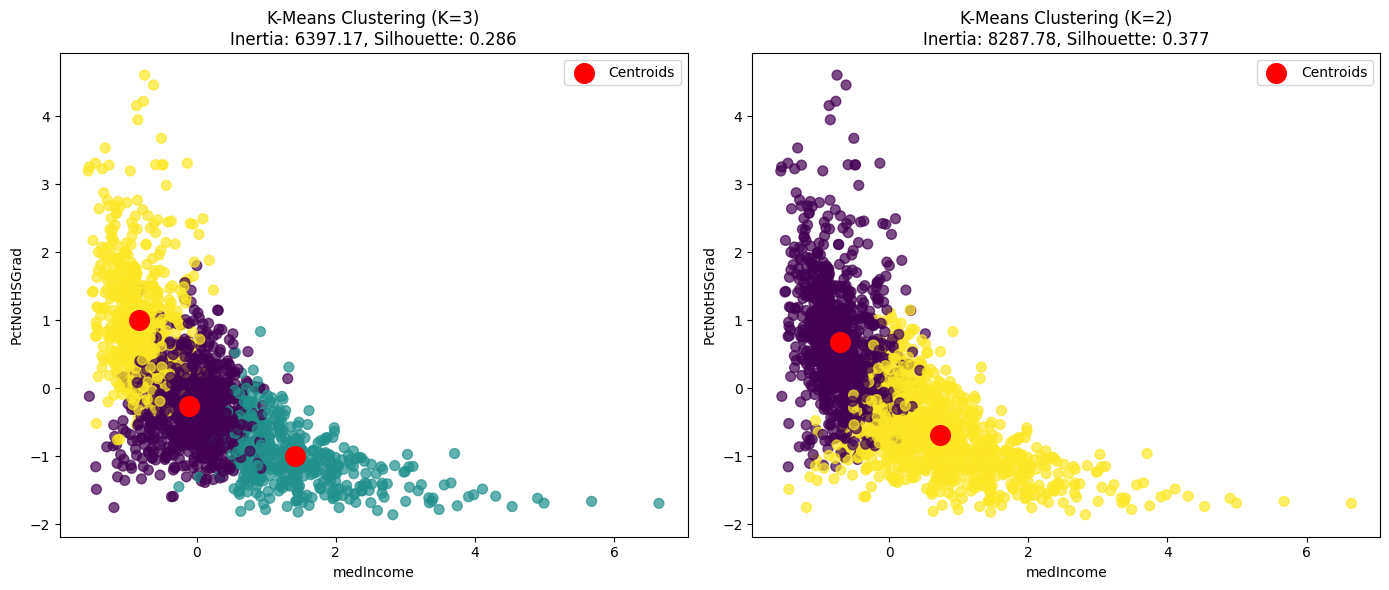

In [65]:
# Use the specified y-axis (PctNotHSGrad)
y_axis_column = 'PctNotHSGrad'

# Create subplots to display both visualizations side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for K = 3
axes[0].scatter(X_scaled[:, 0], X_scaled[:, X.columns.get_loc(y_axis_column)], c=clusters_3, cmap='viridis', s=50, alpha=0.7)
axes[0].scatter(kmeans_3.cluster_centers_[:, 0], kmeans_3.cluster_centers_[:, X.columns.get_loc(y_axis_column)], s=200, c='red', label='Centroids')
axes[0].set_title(f"K-Means Clustering (K=3)\nInertia: {inertia_3:.2f}, Silhouette: {sil_score_3:.3f}")
axes[0].set_xlabel(X.columns[0])
axes[0].set_ylabel(y_axis_column)
axes[0].legend()

# Plot for K = 2
axes[1].scatter(X_scaled[:, 0], X_scaled[:, X.columns.get_loc(y_axis_column)], c=clusters_2, cmap='viridis', s=50, alpha=0.7)
axes[1].scatter(kmeans_2.cluster_centers_[:, 0], kmeans_2.cluster_centers_[:, X.columns.get_loc(y_axis_column)], s=200, c='red', label='Centroids')
axes[1].set_title(f"K-Means Clustering (K=2)\nInertia: {inertia_2:.2f}, Silhouette: {sil_score_2:.3f}")
axes[1].set_xlabel(X.columns[0])
axes[1].set_ylabel(y_axis_column)
axes[1].legend()

# Display the plots
plt.tight_layout()
plt.show()
